# Webscrape the East Bay for category: Rooms/Shares

In [2]:
#import get to call a get request on the site
from requests import get

In [3]:
#get the first page of the east bay housing prices
response = get('https://sfbay.craigslist.org/search/eby/roo?hasPic=1&availabilityMode=0') #get rid of those lame-o's that post a housing option without a pic using their filter

print(response.text[:500])

﻿<!DOCTYPE html>
<html class="no-js"><head>
    <title>SF bay area rooms &amp; shares  - craigslist</title>

    <meta name="description" content="SF bay area rooms &amp; shares  - craigslist">
    <meta http-equiv="X-UA-Compatible" content="IE=Edge"/>
    <link rel="canonical" href="https://sfbay.craigslist.org/search/eby/roo">
    <link rel="alternate" type="application/rss+xml" href="https://sfbay.craigslist.org/search/eby/roo?availabilityMode=0&amp;format=rss&amp;hasPic=1" title="RSS feed fo


In [4]:
from bs4 import BeautifulSoup

In [5]:
#grab the HTML as a BS4 soup object
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [6]:
#get the macro-container for the housing posts
posts = html_soup.find_all('li', class_= 'result-row')
print(type(posts)) #to double check that I got a ResultSet
print(len(posts)) #to double check I got 50 (elements/page)

<class 'bs4.element.ResultSet'>
120


In [7]:
#grab the first post
post_one = posts[0]
post_one

<li class="result-row" data-pid="6796639965" data-repost-of="6790210620">
<a class="result-image gallery" data-ids="1:00P0P_h8oborlgBaG,1:00d0d_kFgYflaAxO6,1:00s0s_fHVk389grOF" href="https://sfbay.craigslist.org/eby/roo/d/concord-roommate-wanted-in-cozy-2bd/6796639965.html">
<span class="result-price">$1000</span>
</a>
<p class="result-info">
<span class="icon icon-star" role="button">
<span class="screen-reader-text">favorite this post</span>
</span>
<time class="result-date" datetime="2019-01-21 06:51" title="Mon 21 Jan 06:51:16 AM">Jan 21</time>
<a class="result-title hdrlnk" data-id="6796639965" href="https://sfbay.craigslist.org/eby/roo/d/concord-roommate-wanted-in-cozy-2bd/6796639965.html">Roommate wanted in cozy 2bd/1.5ba townhouse</a>
<span class="result-meta">
<span class="result-price">$1000</span>
<span class="housing">
                    973ft<sup>2</sup> -
                </span>
<span class="result-hood"> (concord / pleasant hill / martinez)</span>
<span class="result-ta

In [8]:
#grab the price of the first post
post_one_price = post_one.a.text
post_one_price

'\n$1000\n'

In [9]:
#grab the time of the post in datetime format to save on cleaning efforts
post_one_time = post_one.find('time', class_= 'result-date')
post_one_datetime = post_one_time['datetime']

#split them and grab each element of the resulting list to get date and time
post_one_datetime = post_one_datetime.split(' ')
post_one_date = post_one_datetime[0]
post_one_date

#element 2 is the time
post_one_time = post_one_datetime[1]

post_one_time

'06:51'

In [10]:
#title is a and that class, link is grabbing the href attribute of that variable
post_one_title = post_one.find('a', class_='result-title hdrlnk')
post_one_link = post_one_title['href']
post_one_link

'https://sfbay.craigslist.org/eby/roo/d/concord-roommate-wanted-in-cozy-2bd/6796639965.html'

In [11]:
#easy to grab the post title by taking the text element of the title variable
post_one_title_text = post_one_title.text
post_one_title_text

'Roommate wanted in cozy 2bd/1.5ba townhouse'

In [12]:
#the neighborhood is grabbed by finding the span class 'result-hood' and pulling the text element from that
post_one_hood = post_one.find('span', class_= 'result-hood').text
post_one_hood

' (concord / pleasant hill / martinez)'

In [13]:
#build out the loop
from time import sleep
from random import randint
from warnings import warn
from time import time
from IPython.core.display import clear_output
import numpy as np

#find the total number of posts to find the limit of the pagination
results_num = html_soup.find('div', class_= 'search-legend')
results_total = int(results_num.find('span', class_='totalcount').text)

pages = np.arange(0, results_total, 120)

iterations = 0

post_timing = []
post_hoods = []
post_title_texts = []
post_links = []
post_prices = []

for page in pages:
    
    #get request
    response = get("https://sfbay.craigslist.org/search/eby/roo?" 
                   + "s=" 
                   + str(page) 
                   + "&hasPic=1"
                   + "&availabilityMode=0")

    sleep(randint(1,5))
     
    #throw warning for status codes that are not 200
    if response.status_code != 200:
        warn('Request: {}; Status code: {}'.format(requests, response.status_code))
        
    #define the html text
    page_html = BeautifulSoup(response.text, 'html.parser')
    
    #define the posts
    posts = html_soup.find_all('li', class_= 'result-row')
        
    #extract data item-wise
    for post in posts:

        if post.find('span', class_ = 'result-hood') is not None:

            #posting date
            #grab the datetime element 0 for date and 1 for time
            post_datetime = post.find('time', class_= 'result-date')['datetime']
            post_timing.append(post_datetime)

            #neighborhoods
            post_hood = post.find('span', class_= 'result-hood').text
            post_hoods.append(post_hood)

            #title text
            post_title = post.find('a', class_='result-title hdrlnk')
            post_title_text = post_title.text
            post_title_texts.append(post_title_text)

            #post link
            post_link = post_title['href']
            post_links.append(post_link)

            post_price = post.a.text
            post_prices.append(post_price)


    iterations += 1
    print("Finished iteration: " + str(iterations))

Finished iteration: 1
Finished iteration: 2
Finished iteration: 3
Finished iteration: 4
Finished iteration: 5
Finished iteration: 6
Finished iteration: 7
Finished iteration: 8
Finished iteration: 9
Finished iteration: 10
Finished iteration: 11
Finished iteration: 12
Finished iteration: 13


In [14]:
import pandas as pd

eb_rooms = pd.DataFrame({'posted': post_timing,
                       'neighborhood': post_hoods,
                       'post title': post_title_texts,
                       'URL': post_links,
                       'price': post_prices})
print(eb_rooms.info())
eb_rooms.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 5 columns):
posted          1560 non-null object
neighborhood    1560 non-null object
post title      1560 non-null object
URL             1560 non-null object
price           1560 non-null object
dtypes: object(5)
memory usage: 61.0+ KB
None


,posted,neighborhood,post title,URL,price
1550,2019-01-20 17:03,(fairfield / vacaville),Quiet and Spacious room for rent in Fairfield ...,https://sfbay.craigslist.org/eby/roo/d/fairfie...,\n$850\n
1551,2019-01-20 17:03,(oakland lake merritt / grand),Roommate wanted for 2 BR apartment in Clinton,https://sfbay.craigslist.org/eby/roo/d/oakland...,\n$1150\n
1552,2019-01-20 17:03,(hayward / castro valley),Single room with private bath - walking to Bar...,https://sfbay.craigslist.org/eby/roo/d/hayward...,\n$1150\n
1553,2019-01-20 17:02,(hayward / castro valley),Single room with private bath - walking to Bar...,https://sfbay.craigslist.org/eby/roo/d/hayward...,\n$1150\n
1554,2019-01-20 17:01,(fremont / union city / newark),Roommate wanted to share 2BR 1 Bath Apt,https://sfbay.craigslist.org/eby/roo/d/fremont...,\n$1150\n
1555,2019-01-20 16:59,"(hercules, pinole, san pablo, el sob)",Fully Furnished Room for Rent,https://sfbay.craigslist.org/eby/roo/d/crocket...,\n$1000\n
1556,2019-01-20 16:56,(hayward / castro valley),"Large Unfurnished Master Suite, all utilities ...",https://sfbay.craigslist.org/eby/roo/d/hayward...,\n$1400\n
1557,2019-01-20 16:55,(fairfield / vacaville),Room for rent,https://sfbay.craigslist.org/eby/roo/d/fairfie...,\n$800\n
1558,2019-01-20 16:54,(fairfield / vacaville),Quiet and Spacious room for rent in Fairfield ...,https://sfbay.craigslist.org/eby/roo/d/fairfie...,\n$850\n
1559,2019-01-20 16:50,(hayward / castro valley),雅房出租 CSUEB Hayward 東灣大學,https://sfbay.craigslist.org/eby/roo/d/csueb-h...,\n$600\n


# Data cleaning

In [15]:
#convert datetime string into datetime object to be able to work with it
from datetime import datetime

eb_rooms['posted'] = pd.to_datetime(eb_rooms['posted'])
eb_rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 5 columns):
posted          1560 non-null datetime64[ns]
neighborhood    1560 non-null object
post title      1560 non-null object
URL             1560 non-null object
price           1560 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 61.0+ KB


In [16]:
eb_rooms['price'] = eb_rooms['price'].astype(str)

In [17]:
import re

eb_rooms['price'] = eb_rooms['price'].apply(lambda x: re.sub(r'[\n$]+', '', x))

#replace '' with NaN values in the df before turning the column to int so data shape is maintained

In [18]:
import numpy as np
eb_rooms['price'].replace('', np.nan, inplace=True)

In [19]:
#drop the NAs, I don't like them and we have a lot of data
eb_rooms = eb_rooms.dropna()

In [20]:
#first remove the parentheses
eb_rooms['neighborhood'] = eb_rooms['neighborhood'].apply(lambda x: re.sub(r'[()]+', '', x))

#and the /
eb_rooms['neighborhood'] = eb_rooms['neighborhood'].apply(lambda x: re.sub(r'[/]+', '', x))

#and commas
eb_rooms['neighborhood'] = eb_rooms['neighborhood'].apply(lambda x: re.sub(r'[,]+', '', x)) 

In [21]:
#people spam craigslist so how many of these are unique?
eb_rooms = eb_rooms.drop_duplicates(subset='URL')

In [22]:
#now turn the price to int
eb_rooms['price'] = eb_rooms['price'].astype(int)

In [23]:
eb_rooms.info() #finally a quantitative variable!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 119
Data columns (total 5 columns):
posted          119 non-null datetime64[ns]
neighborhood    119 non-null object
post title      119 non-null object
URL             119 non-null object
price           119 non-null int32
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 5.1+ KB


In [24]:
eb_rooms['neighborhood'] = eb_rooms['neighborhood'].apply(lambda x: x.lstrip(' '))

C:\Users\riley\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


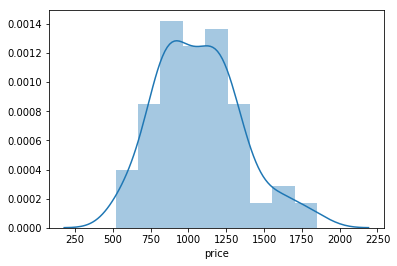

In [25]:
#start to look at the distributions
from matplotlib import figure
import matplotlib as plt
import seaborn as sns
%matplotlib inline

#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(eb_rooms['price']);

In [31]:
pd.options.display.max_colwidth = 100
cheap_berkeley = eb_rooms[(eb_rooms['price'] < 1000) & (eb_rooms['neighborhood'] == 'berkeley')]
cheap_berkeley

,posted,neighborhood,post title,URL,price
5,2019-01-21 05:48:00,berkeley,"UCBERKELEY, BART, STORES ALL NEARBY FURNISHED ROOM AVAIL INC UTILITIES",https://sfbay.craigslist.org/eby/roo/d/berkeley-ucberkeley-bart-stores-all/6800066993.html,800
40,2019-01-20 22:19:00,berkeley,☎ Shared Rooms FOR RENT! ☎ 2500 DANA ST,https://sfbay.craigslist.org/eby/roo/d/berkeley-shared-rooms-for-rent-2500/6785207230.html,850
68,2019-01-20 20:18:00,berkeley,BEDROOM AVAILABLE AT DUPLEX IN BERKELEY,https://sfbay.craigslist.org/eby/roo/d/berkeley-bedroom-available-at-duplex-in/6792957660.html,900
105,2019-01-20 17:09:00,berkeley,Converted single bedroom -- sudden move so lower price,https://sfbay.craigslist.org/eby/roo/d/berkeley-converted-single-bedroom/6799879981.html,550
